# Import Libraries



In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [99]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preliminary Look

In [100]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [102]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation:
1.   There's no missing data
2.   Data contains 21 columns with 7043 rows
3.   TotalCharges have wrong data type (object), should change it to float
4.   TotalCharges contain white space (undetected missing data, because of wrong data type), exclude rows which contain white space before changing to float because it can cause errors





In [103]:
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [104]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Successfully changed TotalCharges data type to float

# Duplicated Data Check

In [106]:
df.duplicated().sum()

0

There's no duplicated data

# Data Understanding

## Statistical Summary

In [107]:
#group column names based on type
categorical = ['gender','Partner','Dependents','PhoneService',
               'MultipleLines','InternetService','OnlineSecurity',
               'OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','Contract',
               'PaperlessBilling','Churn','PaymentMethod']
numerical = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [108]:
#numerical statistical summary
df[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [109]:
#value counts discrete columns
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Observation:
*   Overall, the minimum and maximum values make sense for each column
*   The average of customers tenure value is 32, MonthlyCharges value is 64, and TotalCharges value is 2283
*   `SeniorCitizen` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity
*   Mean > 50% (Median) in `tenure` and `TotalCharges` column, also Mean < 50% (Median) in `MonthlyCharges` indicating somewhat a non symmetrical (skewed) distribution





In [110]:
#categorical statistical summary
df[categorical].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Churn,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,No,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,5163,2365


In [111]:
#showing the precise value counts
for col in categorical:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(),'\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

Value counts of DeviceProtection column
N

Using visualization to make observation easier:

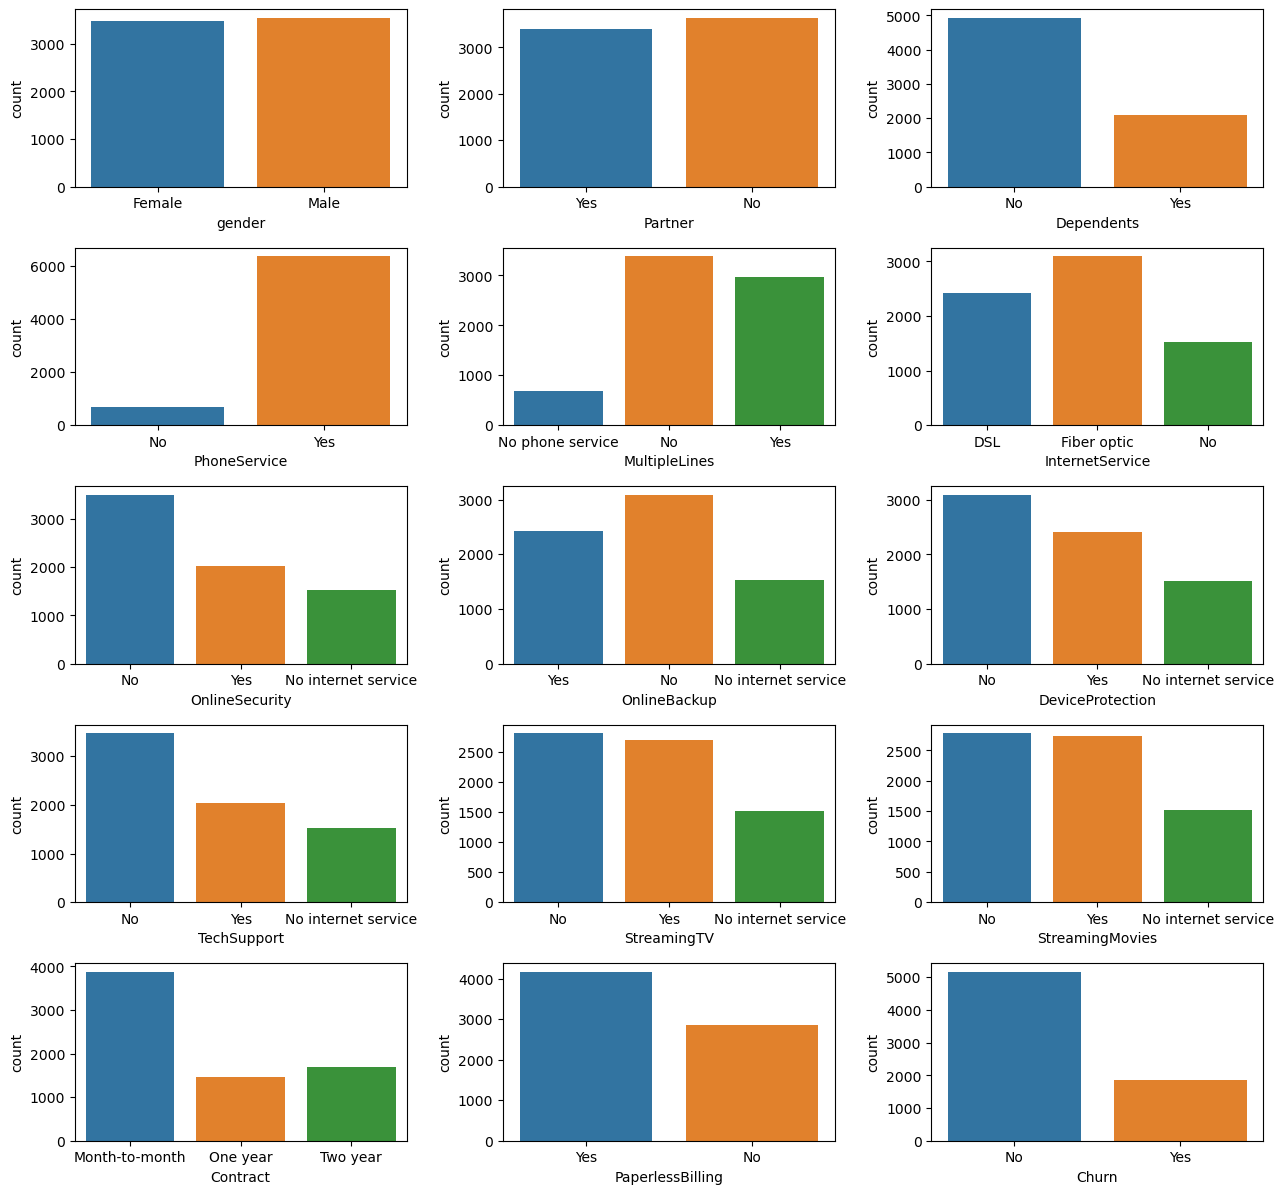

In [112]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(13, 14))

for i in range(len(categorical)):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=df, x=categorical[i], ax=ax)
    ax.set_xlabel(categorical[i])
fig.delaxes(axes[5][2])
fig.delaxes(axes[5][1])
fig.delaxes(axes[5][0])
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

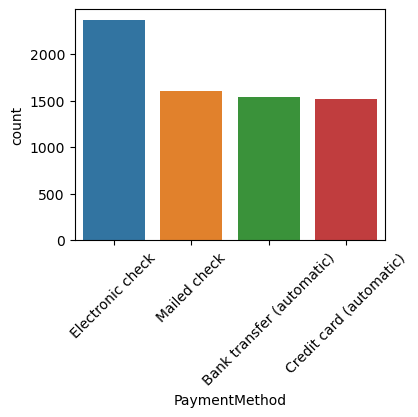

In [113]:
plt.figure(figsize=(4,3))
sns.countplot(df,x='PaymentMethod')
plt.xticks(rotation=45)

Observation:
From the value counts and graphic above we can conclude that,
*   The distribution of gender among customers are roughly equal between male and female, with a slight overlap between them
*   The majority of customers don't have a partner and dependents
*   The majority of customers use phone service, fiber optic as their internet service, paperless billing, and electronic check as payment method
*   The majority of customers don't use multiple lines, online security, online backup, device protection, and tech support
*   The distribution of customers who use streaming TV and streaming movies is roughly equal between those who use and those who don't, with a slight overlap between them
*   The majority of customers don't churn



## Univariate Analysis

### Boxplot to detect outliter

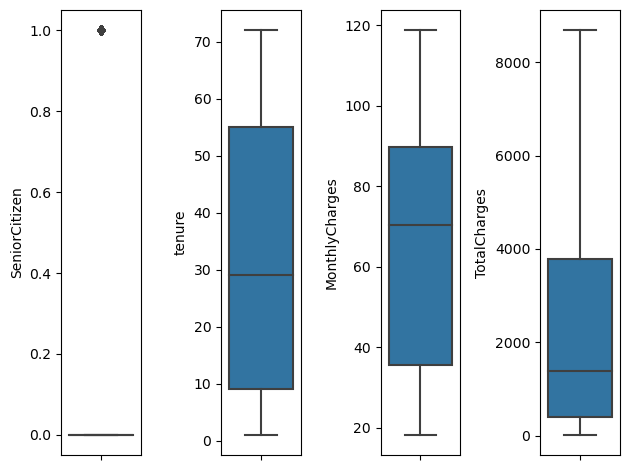

In [114]:
for i in range(0, len(numerical)):
  plt.subplot(1, len(numerical), i+1)
  sns.boxplot(y=df[numerical[i]])
  plt.tight_layout()

There's no outlier

### Histogram with KDE plot to know the distribution form among numerical columns

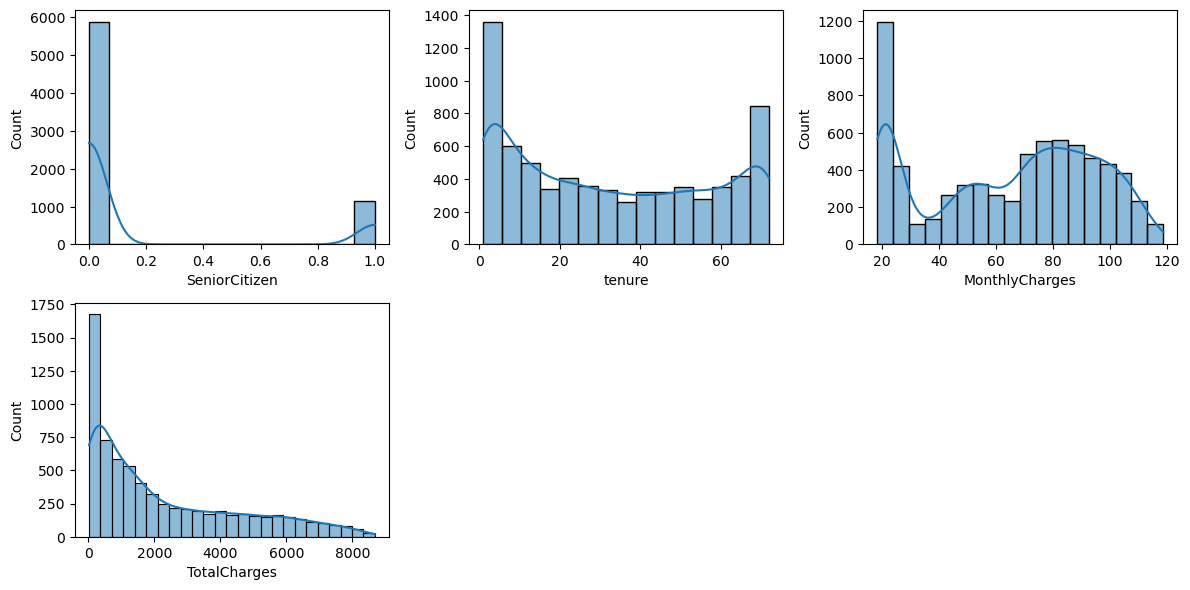

In [115]:
plt.figure(figsize=(12,6))
for i in range(len(numerical)):
  plt.subplot(2, len(numerical)//2 + 1, i+1)
  sns.histplot(x=df[numerical[i]],kde=True)
  plt.xlabel(numerical[i])
  plt.tight_layout()

Observation:
*   The customers mostly are non senior citizen
*   The customers mostly are new customers (tenure 0-5 month), and the second most are old customers (tenure 65-70 month)
*   The customers mostly pay for low/cheap monthly charges (20-25 dollar), and the second most are customers who pay for high/expensive monthly charges (75-110 dollar)
*   The total charges among customers mostly low/cheap (0-2000 dollar)






## Bivariate Analysis

### Bivariate Analysis: Categorical Columns

Churn by Customers Demographic (Gender, Partner and Dependent Status)

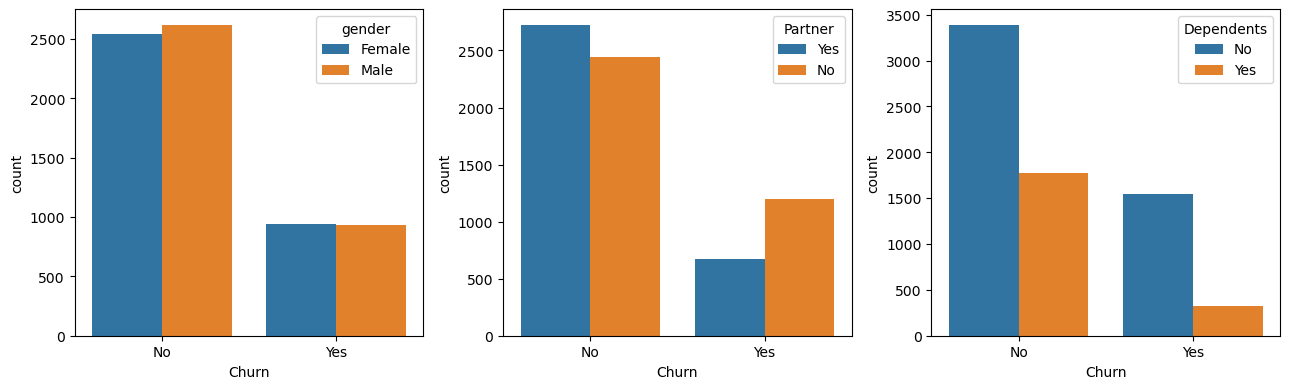

In [120]:
categorical_demographic = ['gender', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))

for i in range(len(categorical_demographic)):
    ax = axes[i]
    sns.countplot(data=df, x='Churn',
                  hue=categorical_demographic[i], ax=ax)
    ax.set_xlabel('Churn')

plt.tight_layout()
plt.show()

Observation:
*   The gender distribution among churn-customers are both equal between female and male
*   Most of churn-customers don't have a partner, while most of non-churn-customers have partner. So in conclusion, the customers who don't have a partner are more likely to churn
*   Both of churn and non-churn customers mostly don't have dependents



Churn by Customers Account Contract & Payment (Contract, Paperless Billing, and Payment Method)

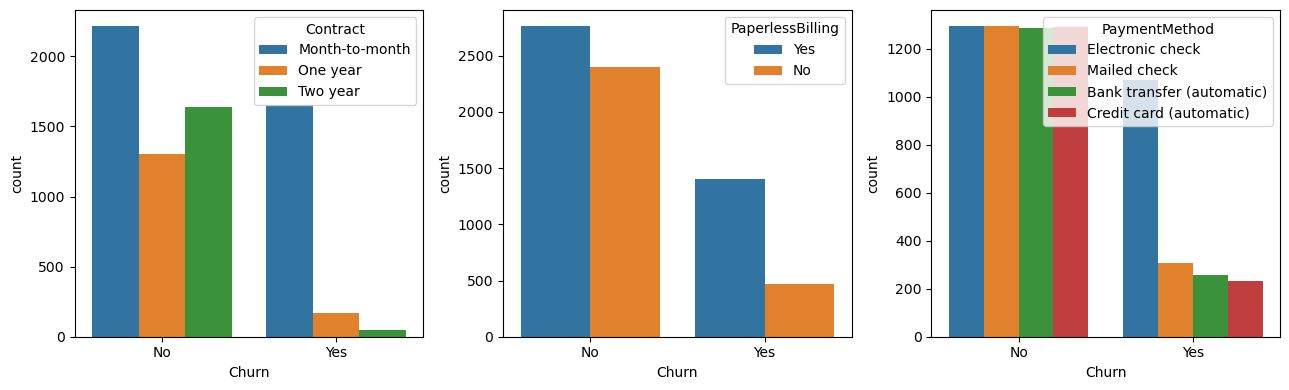

In [125]:
categorical_account = ['Contract', 'PaperlessBilling', 'PaymentMethod']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))

for i in range(len(categorical_account)):
    ax = axes[i]
    sns.countplot(data=df, x='Churn', hue=categorical_account[i], ax=ax)
    ax.set_xlabel('Churn')

plt.tight_layout()
plt.show()

Observation:
*   Most of churn-customers use a month-to-month contract, the longer the contract is the least number of churn-customers are. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time
*   Both of churn and non-churn customers mostly use paperless billing
*   Most of the churn-customers use electronic check as their payment method. So in conclusion, the customers who use electronic check as their payment method are most likely to churn

Churn by Services (Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies)

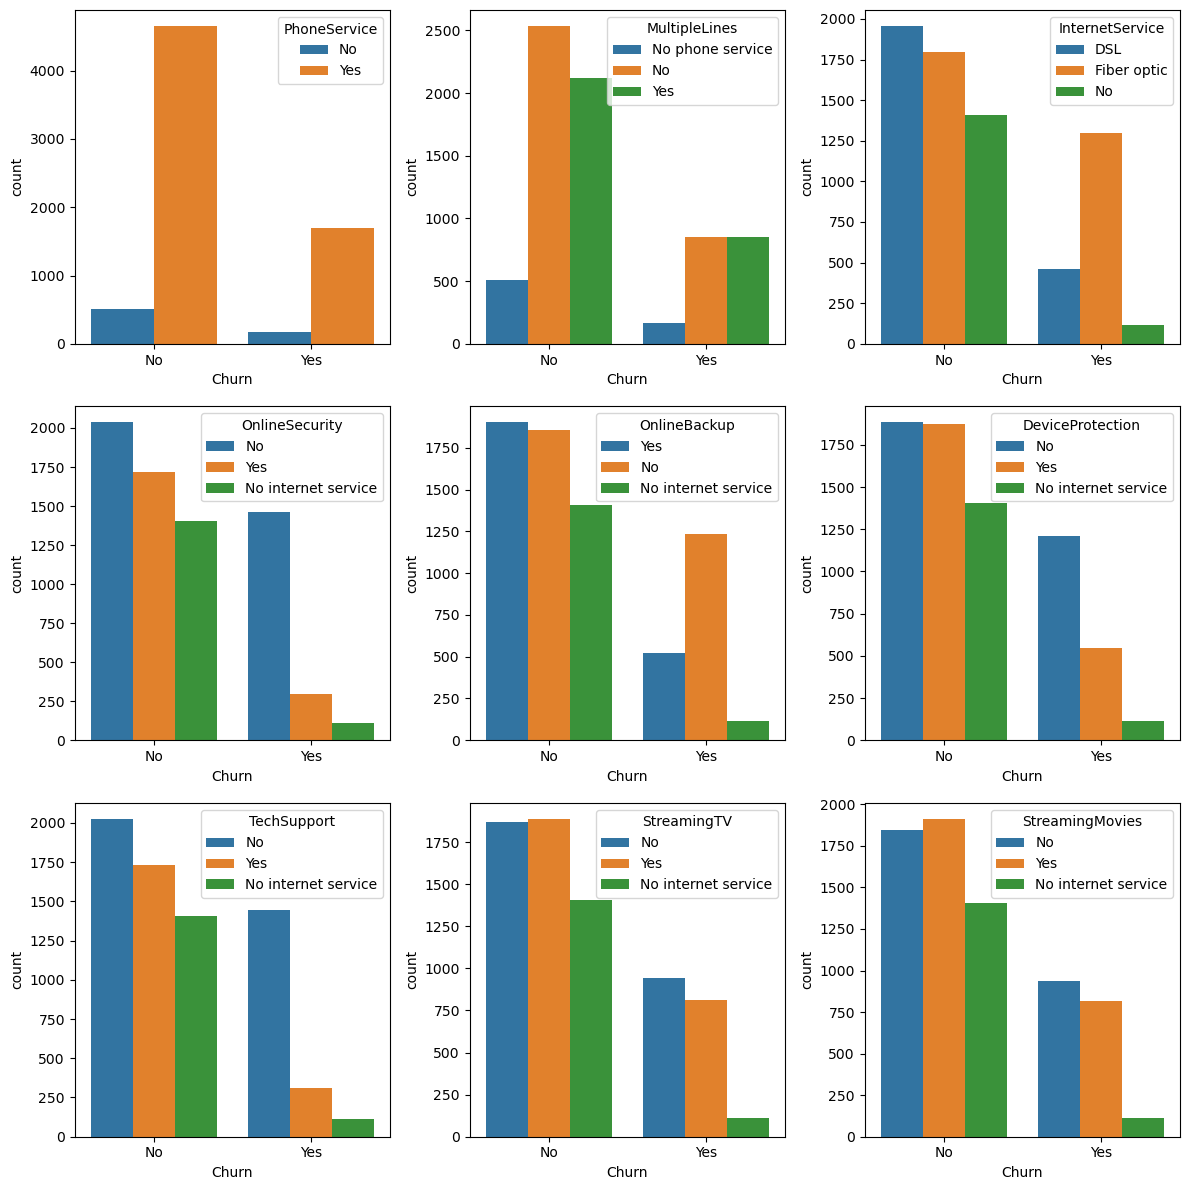

In [124]:
categorical_services = ['PhoneService', 'MultipleLines',
                        'InternetService','OnlineSecurity',
                        'OnlineBackup','DeviceProtection',
                        'TechSupport','StreamingTV',
                        'StreamingMovies']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i in range(len(categorical_services)):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=df, x='Churn', hue=categorical_services[i], ax=ax)
    ax.set_xlabel('Churn')

plt.tight_layout()
plt.show()

Observation:
*   Most of churn-customers are using fiber optic as their internet service. So, the customers who use fiber optic are most likely to churn
*   Most of churn-customers don't use online back up. So, the customers who don't use online back up are most likely to churn
*   The other categories show the same pattern, where both churn and non-churn customers have the same distribution

### Bivariate Analysis: Numerical Columns

<Axes: >

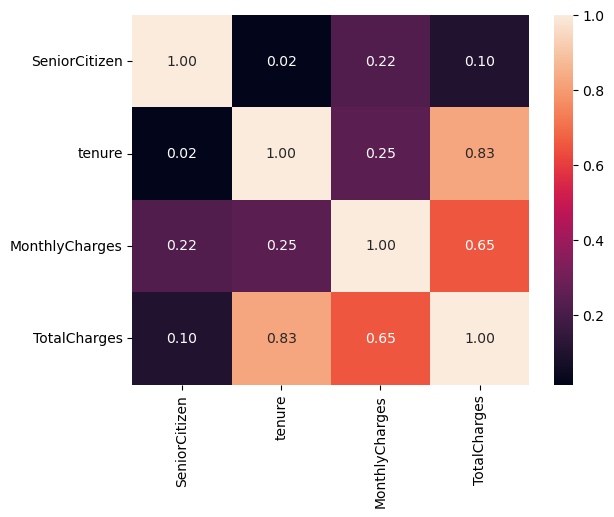

In [38]:
#correlation heatmap
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,fmt='.2f')

Observation:
`TotalCharges` and `tenure` are highly correlated each other (0.83). The longer the tenure is, there's a tendency that the total charges also high

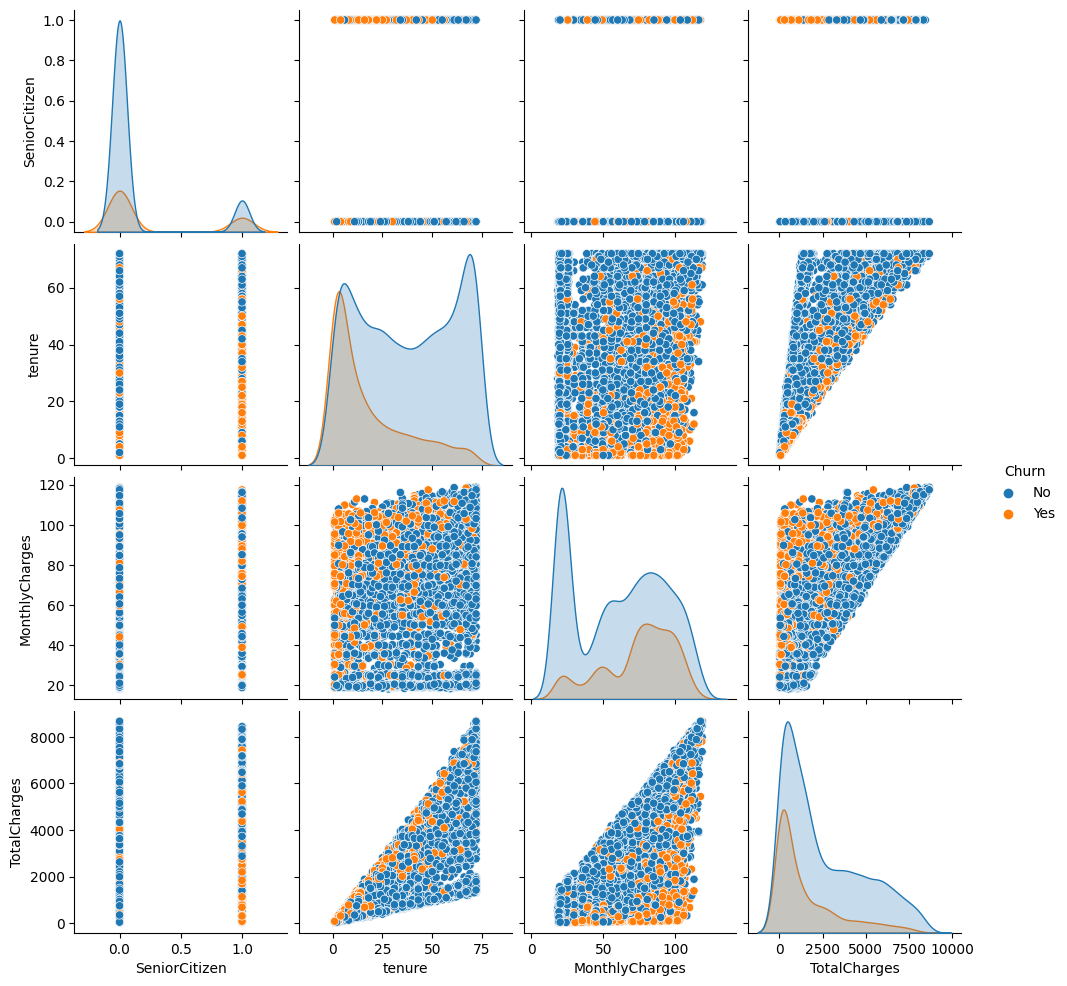

In [21]:
sns.pairplot(df,hue='Churn')

Observation: from the graphic above we can see the distribution of customers who churn and who don't
*   Most of senior or non senior citizen are more likely to stay with the company (not churn)
*   Customers who have higher tenure are more likely to stay with the company (not churn), among churn-customer, the lower tenure (new customer) is more likely to churn
*   Customers who pay for a high monthly charges are more likely to stay with the company (not churn), the same goes for total charges


## Deep-dive Exploration Questions

1.   Who are Top 10 Customers with the most money spend (royal customers)?
2.   Who are Top 10 Churn Customers with the most money spend (royal customers who is churn)?
3.   Who are Top 10 most loyal Customers (highest tenure)?



## Top 10 Customers with the most money spend (royal customers)

In [30]:
top_10_cust = df.groupby('customerID').agg(total_spend=('TotalCharges','sum')).reset_index().sort_values('total_spend',ascending=False).head(10)
top_10_cust

,customerID,total_spend
2000,2889-FPWRM,8684.80
5350,7569-NMZYQ,8672.45
6844,9739-JLPQJ,8670.10
6881,9788-HNGUT,8594.40
6264,8879-XUAHX,8564.75
6982,9924-JPRMC,8547.15
462,0675-NCDYU,8543.25
4710,6650-BWFRT,8529.50
95,0164-APGRB,8496.70
1028,1488-PBLJN,8477.70


<Axes: xlabel='total_spend', ylabel='customerID'>

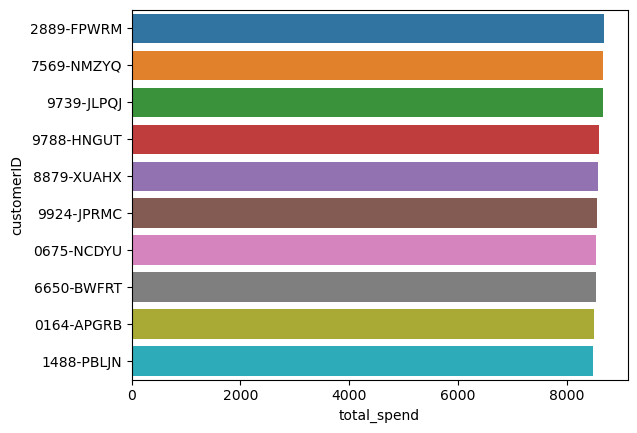

In [46]:
top_10_cust['customerID']=top_10_cust['customerID'].astype(str)
sns.barplot(data=top_10_cust,y='customerID',x='total_spend')

Observation: from the top 10 list of the most royal/biggest spenders customers, by knowing this, the company should pay more attention to them, to rather make efforts to retain them instead of planning more expensive new customer acquisition strategies.  

## Top 10 Churn-Customers with the most money spend (high value customers who is churn)

In [45]:
df_churn = df[df['Churn']=='Yes']
top_10_churn_cust = df_churn.groupby('customerID').agg(total_spend=('TotalCharges','sum')).reset_index().sort_values('total_spend',ascending=False).head(10)
top_10_churn_cust

,customerID,total_spend
535,2889-FPWRM,8684.80
28,0201-OAMXR,8127.60
736,3886-CERTZ,8109.80
262,1444-VVSGW,7968.85
1022,5271-YNWVR,7856.00
1566,8199-ZLLSA,7804.15
1707,9053-JZFKV,7752.30
283,1555-DJEQW,7723.90
617,3259-FDWOY,7723.70
1401,7317-GGVPB,7690.90


<Axes: xlabel='total_spend', ylabel='customerID'>

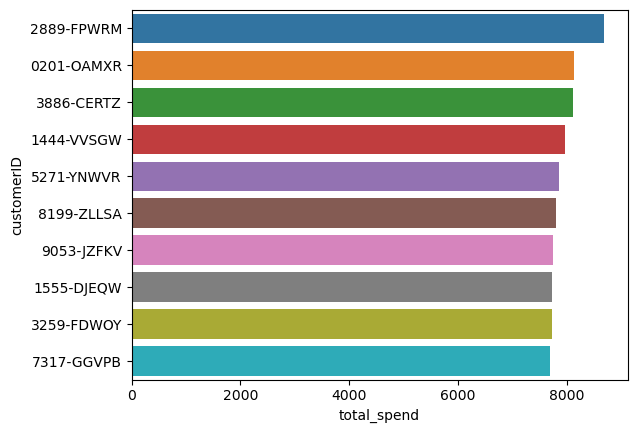

In [52]:
top_10_churn_cust['customerID']=top_10_churn_cust['customerID'].astype(str)
sns.barplot(data=top_10_churn_cust,y='customerID',x='total_spend')

Observation: from the top 10 Churn-Customers with the most money spend, by knowing this, the company should pay attention to win them back/re-engage lost customers, based from the money they spend, they are worth the effort

## Top 10 most loyal Customers

In [49]:
top_10_loyal = df.sort_values('tenure',ascending=False).head(10)
top_10_loyal

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2988,6295-OSINB,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,109.65,7880.25,No
3823,9065-ZCPQX,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),78.85,5763.15,No
3886,3786-WOVKF,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),106.85,7677.40,No
6659,3967-KXAPS,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.30,6719.90,No
6661,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784.00,No
4697,0129-KPTWJ,Male,0,Yes,No,72,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,6747.35,No
1753,2057-BOYKM,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.50,No
1746,3963-RYFNS,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.45,8013.55,No
6189,4718-WXBGI,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.95,6614.90,No
1735,2040-XBAVJ,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.45,8100.55,No


<Axes: xlabel='tenure', ylabel='customerID'>

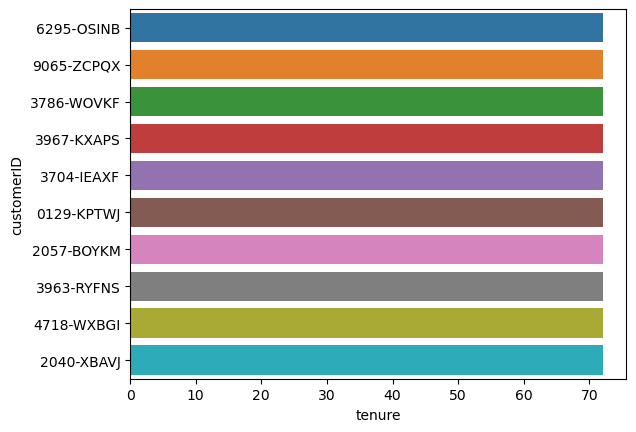

In [53]:
sns.barplot(data=top_10_loyal,y='customerID',x='tenure')

Observation: from knowing the top 10 most loyal customers, these customers also can bring value to the company, meaning they have indirectly established themselves as the company’s online advocates, and suggesting the service to other friends or relatives.